# ХРОМАТОГРАФИЯ
### Теоретическая часть
Объемная скорость течения жидкости вниз по капилляру:
$$Q = \frac{\pi r^4}{8 \eta x} (\rho g x + \frac{2 \sigma \cos{x}}{r})$$
$$\frac{d x}{d t} = V = \frac{k}{x},\, где\, k = \frac{r \sigma \cos{\theta}}{4 \eta}$$

Вверх по каппиляру:
$$Q = \frac{\pi r^4}{8 \eta x} (\frac{2 \sigma \cos{x}}{r} - \rho g x)$$
$$r = \sqrt{k \frac{8 \eta}{\rho g x_{max}}},\, где\, r - радиус\, капилляра$$

### Оборудование
Стакан с водой, полоски фильтровальной бумаги с цветной полосой, штатив с муфтой и лапкой, линейка, секундомер.

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

## Вниз по капилляру

In [2]:
data_down = pandas.read_csv('res_down.csv')
data_down

,x,t
0,5,8
1,10,32
2,15,83
3,20,168
4,25,280
5,30,424
6,35,625
7,40,896
8,45,1222
9,50,1672


In [3]:
data_down['t'] = pandas.Series([(t - data_down['t'][i - 1] if i != 0 else t) for i, t in enumerate(data_down['t'])])
data_down

,x,t
0,5,8
1,10,24
2,15,51
3,20,85
4,25,112
5,30,144
6,35,201
7,40,271
8,45,326
9,50,450


In [4]:
data_down['x_norm'] = data_down['x'] * 0.001
data_down['v'] = pandas.Series([0.005 / t for t in data_down['t']])
data_down['delta_v'] = pandas.Series([(0.1 + (0.3 / t)) * (0.005 / t) for t in data_down['t']])

In [5]:
data_down['x2_norm'] = data_down['x_norm'] ** 2
x2_norm_delta = [(x ** 2) * (0.001 / x) for x in data_down['x_norm']]
data_down['delta_x2'] = pandas.Series(x2_norm_delta)

In [6]:
data_down['1/x_norm'] = 1 / data_down['x_norm']
data_down['delta_1/x'] = pandas.Series([(1 / x) * (0.001 / x) for x in data_down['x_norm']])
data_down

,x,t,x_norm,v,delta_v,x2_norm,delta_x2,1/x_norm,delta_1/x
0,5,8,0.005,0.000625,8.593750e-05,0.000025,0.000005,200.000000,40.000000
1,10,24,0.010,0.000208,2.343750e-05,0.000100,0.000010,100.000000,10.000000
2,15,51,0.015,0.000098,1.038062e-05,0.000225,0.000015,66.666667,4.444444
3,20,85,0.020,0.000059,6.089965e-06,0.000400,0.000020,50.000000,2.500000
4,25,112,0.025,0.000045,4.583865e-06,0.000625,0.000025,40.000000,1.600000
5,30,144,0.030,0.000035,3.544560e-06,0.000900,0.000030,33.333333,1.111111
6,35,201,0.035,0.000025,2.524690e-06,0.001225,0.000035,28.571429,0.816327
7,40,271,0.040,0.000018,1.865443e-06,0.001600,0.000040,25.000000,0.625000
8,45,326,0.045,0.000015,1.547857e-06,0.002025,0.000045,22.222222,0.493827
9,50,450,0.050,0.000011,1.118519e-06,0.002500,0.000050,20.000000,0.400000


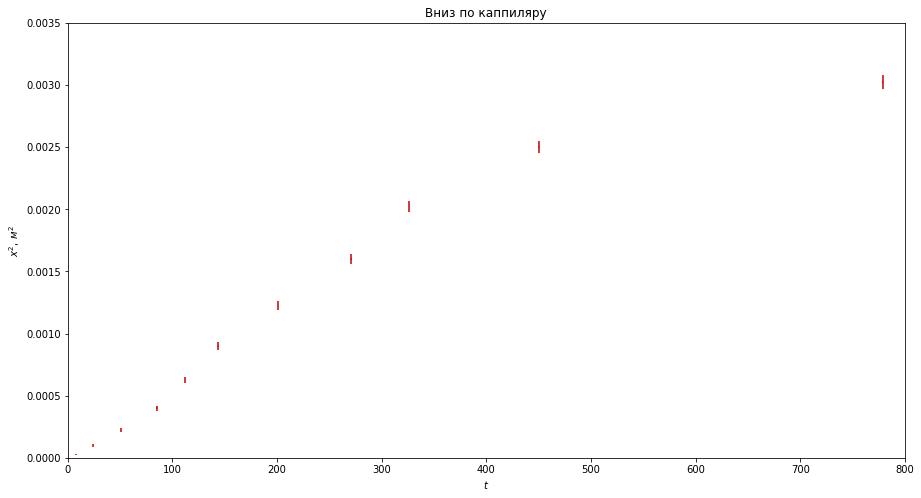

In [7]:
plt.figure(figsize=(15, 8))
plt.title(u'Вниз по каппиляру')
plt.ylabel(u'$x^2,\, м^2$')
plt.xlabel('$t$')
for row in data_down.as_matrix():
    plt.axis((0, 800, 0, 0.0035))
    plt.errorbar(x=row[1], y=row[5],
                 xerr=0.3, yerr=row[6],
                 label=True, color='#C00000')
plt.show()

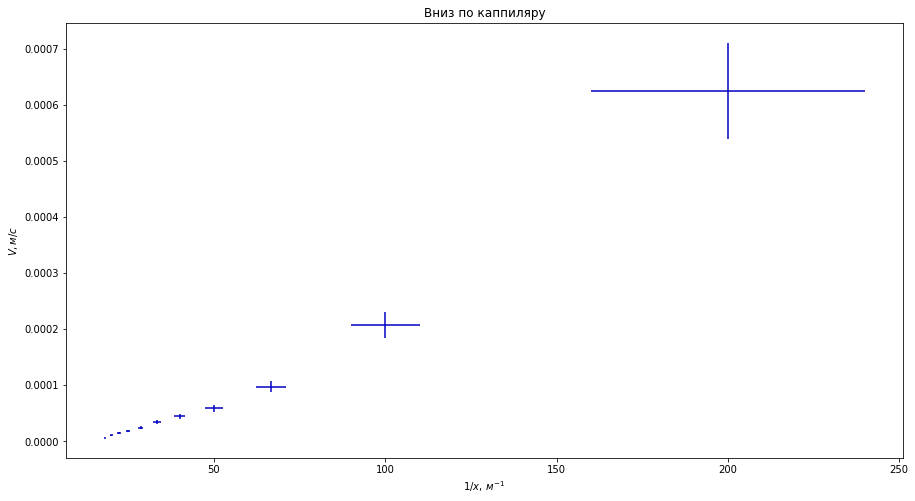

In [8]:
plt.figure(figsize=(15, 8))
plt.title(u'Вниз по каппиляру')
plt.xlabel(u'$1/x,\, м^{-1}$')
plt.ylabel(u'$V, м/с$')
for row in data_down.as_matrix():
    plt.errorbar(x=row[7], y=row[3],
                 xerr=row[8], yerr=row[4],
                 label=True, color='#0000C0')
plt.show()

## Вверх по капилляру

In [9]:
data_up = pandas.read_csv('res_up.csv')
data_up

,x,t
0,5,21
1,10,77
2,15,175
3,20,313
4,25,500
5,30,755
6,35,1158
7,40,1913
8,45,3234
9,46,4786


In [10]:
data_up['t'] = pandas.Series([(t - data_up['t'][i - 1] if i != 0 else t) for i, t in enumerate(data_up['t'])])
data_up

,x,t
0,5,21
1,10,56
2,15,98
3,20,138
4,25,187
5,30,255
6,35,403
7,40,755
8,45,1321
9,46,1552


In [11]:
data_up['x_norm'] = data_up['x'] * 0.001
data_up['v'] = pandas.Series([0.005 / t for t in data_up['t']])
data_up['delta_v'] = pandas.Series([(0.1 + (0.3 / t)) * (0.005 / t) for t in data_up['t']])

In [12]:
data_up['x2_norm'] = data_up['x_norm'] ** 2
x2_norm_delta = [(x ** 2) * (0.001 / x) for x in data_up['x_norm']]
data_up['delta_x2'] = pandas.Series(x2_norm_delta)

In [13]:
data_up['1/x_norm'] = 1 / data_up['x_norm']
data_up['delta_1/x'] = pandas.Series([(1 / x) * (0.001 / x) for x in data_up['x_norm']])
data_up

,x,t,x_norm,v,delta_v,x2_norm,delta_x2,1/x_norm,delta_1/x
0,5,21,0.005,0.000238,2.721088e-05,0.000025,0.000005,200.000000,40.000000
1,10,56,0.010,0.000089,9.406888e-06,0.000100,0.000010,100.000000,10.000000
2,15,98,0.015,0.000051,5.258226e-06,0.000225,0.000015,66.666667,4.444444
3,20,138,0.020,0.000036,3.701953e-06,0.000400,0.000020,50.000000,2.500000
4,25,187,0.025,0.000027,2.716692e-06,0.000625,0.000025,40.000000,1.600000
5,30,255,0.030,0.000020,1.983852e-06,0.000900,0.000030,33.333333,1.111111
6,35,403,0.035,0.000012,1.249931e-06,0.001225,0.000035,28.571429,0.816327
7,40,755,0.040,0.000007,6.648831e-07,0.001600,0.000040,25.000000,0.625000
8,45,1321,0.045,0.000004,3.793607e-07,0.002025,0.000045,22.222222,0.493827
9,46,1552,0.046,0.000003,3.227877e-07,0.002116,0.000046,21.739130,0.472590


In [14]:
data_up

,x,t,x_norm,v,delta_v,x2_norm,delta_x2,1/x_norm,delta_1/x
0,5,21,0.005,0.000238,2.721088e-05,0.000025,0.000005,200.000000,40.000000
1,10,56,0.010,0.000089,9.406888e-06,0.000100,0.000010,100.000000,10.000000
2,15,98,0.015,0.000051,5.258226e-06,0.000225,0.000015,66.666667,4.444444
3,20,138,0.020,0.000036,3.701953e-06,0.000400,0.000020,50.000000,2.500000
4,25,187,0.025,0.000027,2.716692e-06,0.000625,0.000025,40.000000,1.600000
5,30,255,0.030,0.000020,1.983852e-06,0.000900,0.000030,33.333333,1.111111
6,35,403,0.035,0.000012,1.249931e-06,0.001225,0.000035,28.571429,0.816327
7,40,755,0.040,0.000007,6.648831e-07,0.001600,0.000040,25.000000,0.625000
8,45,1321,0.045,0.000004,3.793607e-07,0.002025,0.000045,22.222222,0.493827
9,46,1552,0.046,0.000003,3.227877e-07,0.002116,0.000046,21.739130,0.472590


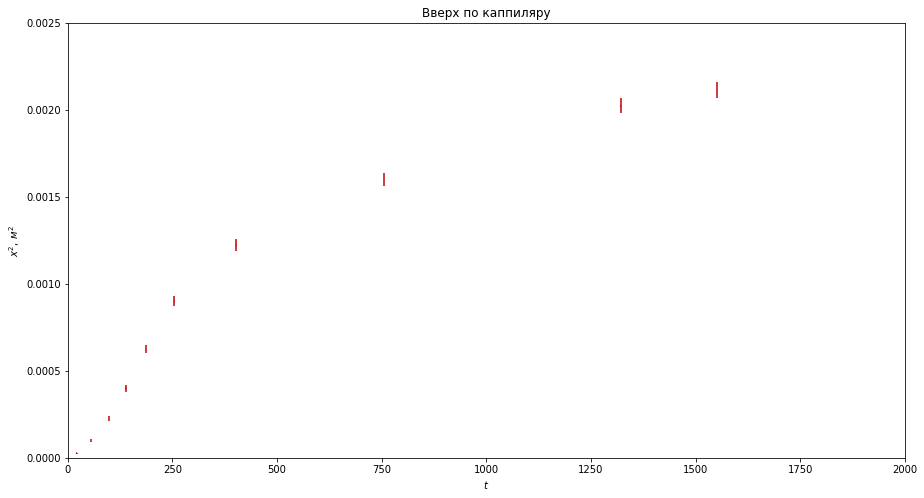

In [15]:
plt.figure(figsize=(15, 8))
plt.title(u'Вверх по каппиляру')
plt.ylabel(u'$x^2,\, м^2$')
plt.xlabel('$t$')
for row in data_up.as_matrix():
    plt.axis((0, 2000, 0, 0.0025))
    plt.errorbar(x=row[1], y=row[5],
                 xerr=0.3, yerr=row[6],
                 label=True, color='#C00000')
plt.show()

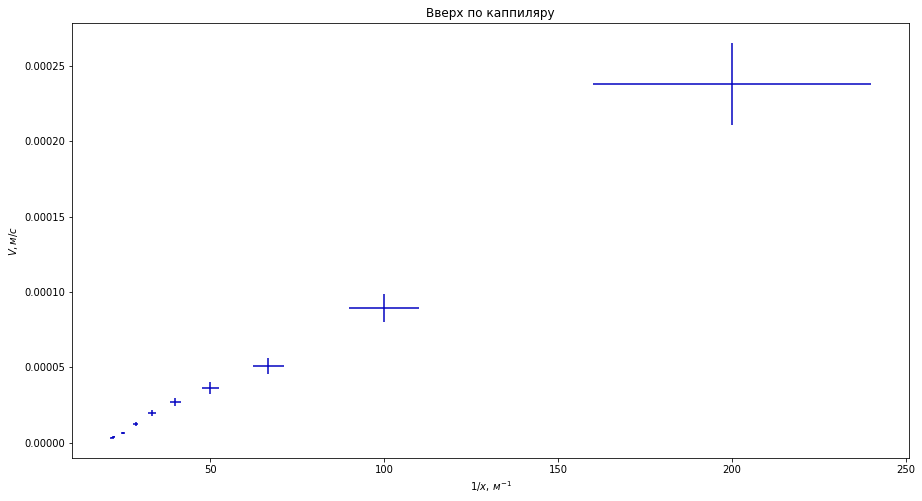

In [16]:
plt.figure(figsize=(15, 8))
plt.title(u'Вверх по каппиляру')
plt.xlabel(u'$1/x,\, м^{-1}$')
plt.ylabel(u'$V, м/с$')
for row in data_up.as_matrix():
    plt.errorbar(x=row[7], y=row[3],
                 xerr=row[8], yerr=row[4],
                 label=True, color='#0000C0')
plt.show()